# Travelling Salesman Problem

## The travelling salesman problems is as follows:
### Given a set of cities, what is the shortest path which a salesman may take in which he/she visits each city once and only once?

### The distribution of cities:

In [1]:
import numpy as np
import itertools
import time
import matplotlib.pyplot as plt
%matplotlib inline



''' For now we will use a carfully chosen seed to produce the same results for all of you.
Try a different on your own time seed to see what happens. '''
np.random.seed(seed=654321)

# input a reasonably small number of cities
num_cities = 8
tour = [(np.random.random(),np.random.random()) for i in range(0,num_cities)]

#''' Comment on what you did here. '''
#first_city = tour[0]
#cities_to_visit = tour[1:]

print('The list of cities is as follows:')
for i in tour:
    print(i)

The list of cities is as follows:
(0.23199402758150622, 0.7325303399769417)
(0.9630900874623036, 0.693171630415151)
(0.8594822901620515, 0.8387018731564947)
(0.07859781285171319, 0.07162241630649324)
(0.03236442331769096, 0.9683632919947247)
(0.6857281650872721, 0.0666011085590329)
(0.16829005545379028, 0.3002763986004753)
(0.4529315872875287, 0.3606575529754059)


### We will of course need to define some functions which will help us solve for the shortest path, or the "cost" as well as a basic plotting function.

The distance between a series of cities is calculated as:
$$
D = \sum_{i=1}^n \sqrt{(x_i-x_{i+1})^2+(y_i-y_{i+1})^2}
$$

In [2]:
## This function takes in a list of cities and computes the distance between them,
## according to the function above.
def cost(path):
    num_cities = len(path)
    distance = sum([np.sqrt((path[i][0]-path[i+1][0])**2+(path[i][1]-path[i+1][1])**2) for i in range(0,num_cities-1)])
    distance += np.sqrt((path[-1][0]-path[0][0])**2+(path[-1][1]-path[0][1])**2)
    return distance

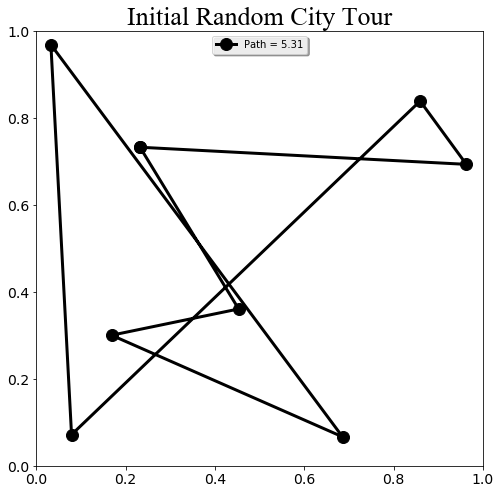

In [3]:
def plot_path(path, title_string=None):
    path.append(path[0])
    plt.figure(figsize=(8,8))
    
    plt.plot([x[0] for x in path],[x[1] for x in path], "ko-",markersize = 12, lw = 3, label=
             'Path = ' + str(round(cost(path[1:]),2)))
    plt.title(title_string, fontsize='26', fontname='Times New Roman')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.00), fancybox=True, shadow=True,numpoints = 1)
    plt.tick_params(axis='both', labelsize=14)
    plt.xlim(0,1)
    plt.ylim(0,1)

def plot_path_n(path1,path2=[(-1,-1)],path3=[(-1,-1)]):
    path1.append(path1[0])
    path2.append(path2[0])
    path3.append(path3[0])
    plt.figure(figsize=(8,8))
    
    plt.plot([x[0] for x in path1],[x[1] for x in path1],"ko-",markersize = 20, lw = 4,label=str(round(cost(path1[1:]),2)))
    
    if len(path2)>2:
        plt.plot([x[0] for x in path2],[x[1] for x in path2],"bo--",markersize = 15, lw = 3,marker='s',label=str(round(cost(path2[1:]),2)))
    if len(path3)>2:
        plt.plot([x[0] for x in path3],[x[1] for x in path3],"ro-.",markersize = 10, lw = 2,label=str(round(cost(path3[1:]),2)))
    
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3, fancybox=True, shadow=True,numpoints = 1)
    plt.tick_params(axis='both', labelsize=14)
    plt.xlim(0,1)
    plt.ylim(0,1)

plot_path(tour, 'Initial Random City Tour')

# Section 1


### The naive approach is to simply compute all known possibilities of the path chosen, otherwise known as
# The Brute Force Method

The runtime is: 1.239898681640625 (s)
Solving for a path length of: 3.54058440968


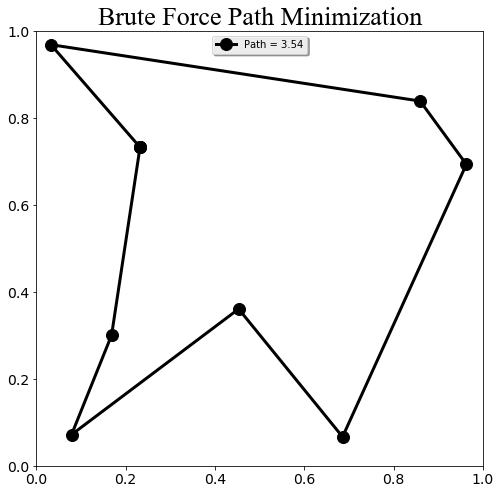

In [4]:
t=time.time()

## By initializing a first city, we can reduce the algorithm time from O(N!) to O((N-1)!)
first_city = tour[0]
cities_to_visit = tour[1:]

## Use itertools to generate a list of every possible permutation to test
brute_candidates = list(itertools.permutations(cities_to_visit))

## Initializethe first permutation to establish a benchmark
brute_min = cost([first_city]+list(brute_candidates[0]))
brute_tour = [first_city]+list(brute_candidates[0])

## Loop through every possible permutation and establish the shortest distance
for i in brute_candidates:
    current_min = cost([first_city] + list(i))
    if current_min < brute_min:
        brute_min = current_min
        brute_tour = [first_city] + list(i)

brute_runtime = time.time() - t

print('The runtime is: ' + str(brute_runtime) + ' (s)')
print('Solving for a path length of: '+str(brute_min))

plot_path(brute_tour, 'Brute Force Path Minimization')

### The advantage of this method is that every possible combination is tried, and thus we are *guaranteed* to solve for the shortest path.
### The disadvantages is that it is computationally expensive!

# Section 2


### Is there a clever algorithm we can use to solve for the shortest path with realistic computational times?
# The 'Greedy Salesman' Algorithm:
### The idea of the greedy algorithm is that the greedy salesman will simply travel to the nearest unvisited city.

The runtime is: 0.0010020732879638672 (s)
The shortest distance as determined by the Greedy Algorithm is: 3.58462332087


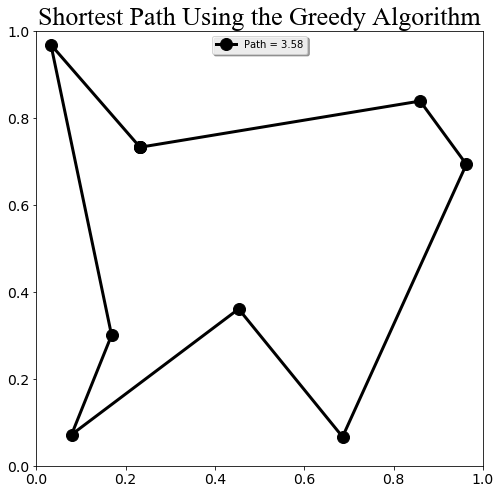

In [5]:
def greedy(tour):
    ## Initialize a starting location for the greedy salesman
    first_city = tour[0]
    cities_to_visit = tour[1:]
    greedy_distance = 0.0
    greedy_final_tour = [first_city]

    ## "while list" returns TRUE as long as the list contains at least
    while cities_to_visit:

        ## Find an initial shortest path to compare to
        next_shortest = np.sqrt((greedy_final_tour[-1][0]-cities_to_visit[0][0])**2+
                                (greedy_final_tour[-1][1]-cities_to_visit[0][1])**2)
        next_ind=0
        next_city=cities_to_visit[0]

        ## Find the shortest path to the unvisited cities
        for ind, i in enumerate(cities_to_visit):
            if np.sqrt((greedy_final_tour[-1][0]-i[0])**2+(greedy_final_tour[-1][1]-i[1])**2)<next_shortest:
                next_shortest = np.sqrt((greedy_final_tour[-1][0]-i[0])**2+(greedy_final_tour[-1][1]-i[1])**2)
                next_ind = ind
                next_city = i

        ## Add this city to the total distance covered and remove the city from the list of unvisited cities
        greedy_distance+=next_shortest
        greedy_final_tour.append(next_city)
        del cities_to_visit[next_ind]

    greedy_distance+=np.sqrt((greedy_final_tour[-1][0]-greedy_final_tour[0][0])**2+
                             (greedy_final_tour[-1][1]-greedy_final_tour[0][1])**2)
    return greedy_distance, greedy_final_tour

## Call the greedy function and unpack the variables
t=time.time()
greedy_distance, greedy_final_tour = greedy(tour)
greedy_runtime = time.time() - t
print('The runtime is: ' + str(greedy_runtime) + ' (s)')

print('The shortest distance as determined by the Greedy Algorithm is: '+str(greedy_distance))

plot_path(greedy_final_tour, 'Shortest Path Using the Greedy Algorithm')

### In this instance, the greedy algorithm has successfully determined the shortest distance, but this was due to careful selection of a random seed. We can easily see when this algorithm fails however. This is illustrated in the following exercise. 

The runtime is: 0.0010013580322265625 (s)
The shortest distance as determined by the Greedy Algorithm is: 3.36063064127


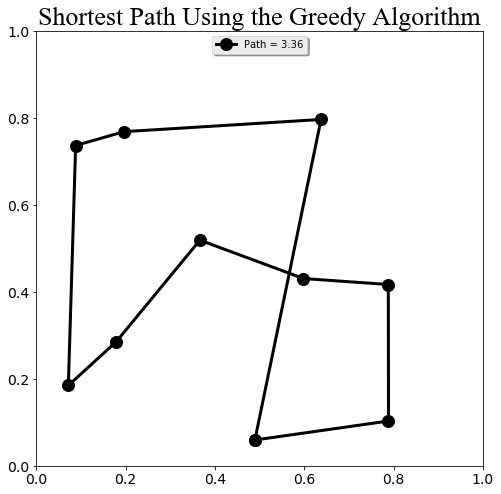

In [6]:
''' All of you can input any random seed you like, and we will create a new list of cities. As a class experiment
we can see how many come up with a path that is by inspection clearly NOT the shortest path.
Experiment with both the random seed and the number of cities. Try the seed 9000. What happens with 100 cities?'''

np.random.seed(seed=5678)
num_cities_2 = 10


tour_2 = [(np.random.random(),np.random.random()) for i in range(0,num_cities_2)]

t=time.time()
greedy_distance_2, greedy_final_tour_2 = greedy(tour_2)
greedy_runtime = time.time() - t
print('The runtime is: ' + str(greedy_runtime) + ' (s)')

print('The shortest distance as determined by the Greedy Algorithm is: '+str(greedy_distance_2))

plot_path(greedy_final_tour_2, 'Shortest Path Using the Greedy Algorithm')

### We can see that this algorithm finds the optimal path for small systems tremendously faster than "Brute Force." However when the systems become larger than just a few cities this algorithm becomes increasingly likely to fail. 
### Is there an improvement that we can make which will reach an optimization with larger systems but will be less computationally intensive than brute force?

# Section 3


# Simulated Annealing

### The simulated annealing algorithm introduces randomization dependent upon a temperature schedule which slowly "cools down" and reduces the randomness. The algorithm is as follows:

1) Swap two points at random

2) If the new path taken is shorter than the old path accept the change

3) Otherwise, accept the change with a probability as a function of temperature

4) Reduce temperature

5) Repeat (1) - (4) until the system has 'cooled' to a low temperature where swaps are highly unlikely

The runtime is: 1.3909873962402344 (s)
The shortest distance as determined by the simulated annealing is: 3.54058440968


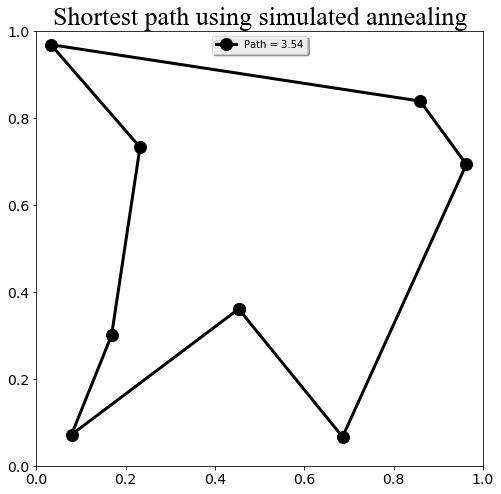

In [11]:
## This function takes in a list of cities and exchanges two at random
def swap_random(seq):
    idx = range(len(seq))
    seq_copy = seq[:]
    i1, i2 = np.random.choice(idx, 2)
    seq_copy[i1], seq_copy[i2] = seq[i2], seq[i1]
    return seq_copy

## This function evaluates the exponential coinflip to determine the probability of accepting a longer path length
def expCoinFlip(s,sprime,T):
    if np.random.random() < np.exp(-(sprime-s)/T):
        return True
    else:
        return False

## Use the same random seed as before for consisistency and comparison
'''Again, try picking a different random seed and a different number of cities to see how it performs.'''
np.random.seed(seed=654321)
num_cities = 8

tour = [(np.random.random(),np.random.random()) for i in range(0,num_cities)]

## The first choice of the order of the cities to use for the initial distance
## Initialize the shortest tour as the first random tour
tour_init = tour[:]
lowest_cost = cost(tour)
shortest_tour = tour

## Setting appropriately chosen parameters
T0 = 0.1
T_f=0.0001
N = 100
T=T0
steps = 100
t=time.time()

for j in range(1,steps):
    tour = tour_init[:]

    for i in range(0,N):
        current_cost = cost(tour)
        next_tour = swap_random(tour)
        next_cost = cost(next_tour)

        if next_cost < cost(tour):
            tour = next_tour

            if next_cost < lowest_cost:
                lowest_cost = next_cost
                shortest_tour = next_tour

        elif expCoinFlip(current_cost, next_cost, T):
            tour = next_tour
    T = T0*(T_f/T0)**(j/steps)
    
sa_runtime = time.time() - t
print('The runtime is: ' + str(sa_runtime) + ' (s)')
print('The shortest distance as determined by the simulated annealing is: '+str(lowest_cost))


plot_path(shortest_tour,"Shortest path using simulated annealing")

### The advantages in run-time are huge, and can be controlled by 'hard coding' carefully selected temperature schedules and the number of iterations
### The disadvantages is simply that there is no guarantee that S.A. will determine the shortest path. It still runs relatively slowly for complex systems.
### The success is highly dependent upon the inital conditions!

# Bonus Section


# Hybrid Methods
### For more complex systems, the most effective approach can be combinations of algorithms
### A good example is the combination of simulated annealing and the greedy salesman
# The SAGS Algorithm

1) "Zoom out" by selection of every $n^{th}$ city. These will be called "Major cities," all other are "Minor Cities."

2) Perform the greedy salesman sorting algorithm for minor cities in between major cities. Major cities are fixed in position and cannot be changed

3) Compute total length of new sorted path

4) Perform simulated annealing by swapping a major city with a major or minor city at random

5) Repeat steps 2), 3)

6) If new path length < old path length, accept the change

7) Perform a "coin flip" based on a temperature schedule to accept the change anyways.

8) Repeat steps 4) - 7) by some number of sweeps

9) Reduce Temperature, repeat 2) - 8)

Initial travel length of: 123.470444291



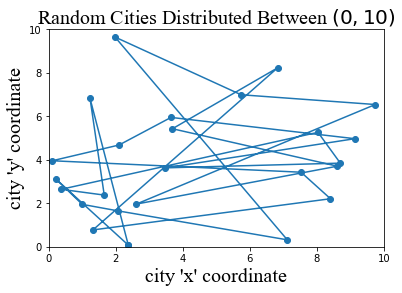

In [12]:
""" This next section of code uses numpy arrays as opposed to lists so we have to re-define some functions. """

def length_finder(coords):
  length = 0.0
  for i in range(len(coords[:,0])):
    j = (i+1) % len(coords[:,0])
    d = np.sqrt( (coords[i,0] - coords[j,0])**2 +
                 (coords[i,1] - coords[j,1])**2 )
    length = length + d  
  return length

def distance(p1, p2):
    d = np.sqrt( (p1[0] - p2[0])**2 + (p1[1] - p2[1])**2 )
    return d

def stochastic(T, cost, mu):
    ''' simple condition test or "coin flip." '''
    r = np.random.rand()
    p = np.exp(-cost*mu/T)
    
    if p > r:
        return True
    else:
        return False


## INITIAL CITY PARAMS ##
num_cities = 25 # Remember this is one less than the list length
                # this is the number of distinct points not list length
X_scale = 10
Y_scale = 10


# Set LINEAR temperature schedule
t, delta_t = np.linspace(1,1*10**-7,100, retstep=True)
T_o = 10.0
T_t = T_o*t
    

# Generate a list of cities as an Nx2 array to populate
cities = np.empty((num_cities+1, 2))

## Seed random number generator
np.random.seed(seed=1234567)

## Randomely Populate cities ##
for i in range(num_cities):
  city_x = X_scale*np.random.rand()
  city_y = Y_scale*np.random.rand()  
  cities[i,:] = np.array([city_x, city_y])

# populate last entry with the first city
cities[num_cities,:] = cities[0,:]

min_length = length_finder(cities)
print('Initial travel length of: ' + str(min_length)); print()

## Show initial cities ##
plt.plot(cities[:,0], cities[:,1], marker='o')
plt.xlim(0,10);plt.ylim(0,10)
plt.title('Random Cities Distributed Between $(0,10)$', fontsize='20', fontname='Times New Roman')
plt.xlabel('city \'x\' coordinate', fontsize='20', fontname='Times New Roman')
plt.ylabel('city \'y\' coordinate', fontsize='20', fontname='Times New Roman')
plt.show()

## Performing the regular S.A. algorithm for comparison

Calculated minimum distance:  53.2854606985

Run time of: 4.39011287689209


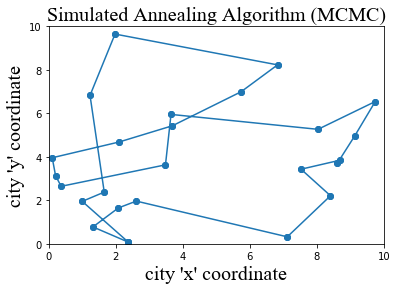

In [9]:
def index_swap(N):
  # Swapping indices at random requires random selection of indices
  # Does not permute the first or last index
  indx1 = np.random.randint(low=1, high=N)
  indx2 = np.random.randint(low=1, high=N)

  # Choose new indices if these are the same
  while indx2-indx1 == 0:
    indx1 = np.random.randint(low=1, high=N)
    indx2 = np.random.randint(low=1, high=N)
  
    if indx2-indx1 == 0:
      continue
    else:
      break
  return indx1, indx2

def SA_TSP(cities, T_t, iterations, mu):
    ''' Expects cities argument to have the same first and last entry. '''
    min_length = length_finder(cities)
    
    for j in range(0,len(T_t)):
        
        T = T_t[j]
        for i in range(0,iterations):
        
          indx1, indx2 = index_swap(num_cities)
          
          # Swapping of the two indices
          cities_new = np.copy(cities)
          cities_new[indx1,:] = cities[indx2,:]
          cities_new[indx2,:] = cities[indx1,:]
          
          # Calls above function to determine new distance
          # between points sequentially
          travel_new = length_finder(cities_new)
          travel_old = length_finder(cities)
          cost = travel_new - travel_old
          
          # If improvement to travel length we keep the change
          if travel_new < min_length:
            min_length = travel_new
            cities = cities_new # Re-write the order of the array
          
          # Based on a stochastic parameter flip anyways even if worse
          else:
            if stochastic(T, cost, mu) == True:
                cities = cities_new
        
    return min_length, cities

t_init = time.time()
shortest_path_SA, new_cities = SA_TSP(cities, T_t, iterations=100, mu=1)
t_fin = time.time()
print('Calculated minimum distance:  ' + str(shortest_path_SA)); print()
print('Run time of: '+ str(t_fin-t_init)+' (s)')
print('100 temperature steps, 100 sweeps.')


plt.plot(new_cities[:,0], new_cities[:,1], marker='o')
plt.scatter(cities[:,0], cities[:,1])
plt.xlim(0,10);plt.ylim(0,10)
plt.title('Simulated Annealing Algorithm (MCMC)', fontsize='20', fontname='Times New Roman')
plt.xlabel('city \'x\' coordinate', fontsize='20', fontname='Times New Roman')
plt.ylabel('city \'y\' coordinate', fontsize='20', fontname='Times New Roman')
plt.show()

## Clearly this algorithm is not guaranteed to work

Calculated minimum distance: 43.8147271505
Run time of: 27.73369812965393


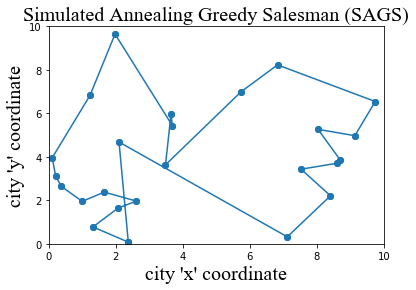

In [10]:
def greedy_SAGS(cities, cluster):
    ''' Expects a np array of a start and end point (2x2). Array of 
    remaining cities is passed in for the greedy salesman to play with. '''

    for i in range(len(cities)-3):
        # Range is len(array) - 3 because the first and last index element
        # are the same so -1, and we permute two at a time so the last
        # "starting point" is two less than the last index
        min_distance = distance(cities[i,:], cities[i+1,:])
        min_index = i+1
        
        for j in range(i+2, len(cities)-1):
            ''' This goes through and checks the remaining entries for the
            nearest point '''
            # Starts two ahead of the i index, as i+1 has been calculated
            # j goes up to (including) one less than the last index number
            new_distance = distance(cities[i,:], cities[j,:])
            
            # This tests for all the major cities, so the greedy sorting 
            # skips the major cities
            if j % cluster == 0:
                continue
            
            if new_distance < min_distance:
                min_index = j
                # If shorter path is found, save that index

        # Use index with shortest path to save new list if not next point
        # This conditional if is to save memory if we dont need to switch
        if min_index != i+1:
            new_array = np.copy(cities)
            new_array[i+1] = cities[min_index]
            new_array[min_index] = cities[i+1]
            cities = np.copy(new_array)
    
    return cities


def cities_reduced(cities, cluster):
    ''' cluster defines the "zooming out" parameter. Reduced cities takes
    the cities list and returns the indices of the "major" cities. 
    "Minor" cities are all cities not major. List of indices for the 
    minor cities is also returned. This sets up the swap between majors
    and minors. '''
    
    major_idx = []; minor_idx=[]
    for i in range(0,len(cities[:,0])):
        if i == (len(cities[:,0])-1):
            major_idx.append(i)
            continue
        if i % cluster == 0:
            major_idx.append(i)
        elif i % cluster != 0:
            minor_idx.append(i)
            
    # Initialize the reduced list        
    major_cities = np.empty((len(major_idx),2))
    minor_cities = np.empty((len(minor_idx),2))
    
    # Assign values to empty list
    for j in range(len(major_idx)):
        index_maj = major_idx[j]
        major_cities[j,:] = cities[index_maj,:]

    for k in range(len(minor_idx)):
        index_min = minor_idx[k]
        minor_cities[k,:] = cities[index_min,:]
    
    return major_idx, minor_idx, major_cities, minor_cities


def swap_maj_min(major_indices, minor_indices):
    ''' This function inputs the lists of indices for both the major cities
    and the minor cities and computes the appropriate major/minor swap. '''
  
    # We do not want to switch the last entry and thus limit the high on
    # the numpy random integers to one less than the list length!!
    indx1=major_indices[np.random.randint(low=1, high=len(major_indices)-1)]
    indx2 = minor_indices[np.random.randint(low=1, high=len(minor_indices))]

    # Choose new indices if these are the same
    while indx2-indx1 == 0:
        indx1 = np.random.randint(low=1, high=len(major_indices))
        indx2 = np.random.randint(low=1, high=len(minor_indices))
  
        if indx2-indx1 == 0:
            continue
        else:
            break
    
    return indx1, indx2


def SAGS(cities, cluster, sweeps, temp_schedule, mu):
    
    reduced_cities = cities_reduced(cities, cluster)
    major_indices,minor_indices,major_cities,minor_cities=reduced_cities

    for i in range(len(temp_schedule)):
        T = temp_schedule[i]
        
        for j in range(sweeps):
            if i == 0 and j == 0:
                # Initial UGLY comparison
                min_distance = length_finder(cities)

            ## SWAP MAJOR/MINOR CITIES ##
            # randomely select any major city to swap with a minor
            # city by its index
            maj_idx, min_idx = swap_maj_min(major_indices, minor_indices)
            
            # Save the swap as cities_new
            cities_new = np.copy(cities)
            cities_new[maj_idx,:] = cities[min_idx]
            cities_new[min_idx,:] = cities[maj_idx]
            
            ## Perform modified GREEDY Algorithm which treats "major" 
            # cities as immovable "stages" and saves as new_cities
            new_cities = greedy_SAGS(cities_new, cluster)
            new_distance = length_finder(new_cities)
            
            if new_distance < min_distance:
                min_distance = new_distance
                cities = np.copy(new_cities)
                
            else:
                old_distance = length_finder(cities)
                cost = new_distance - old_distance
                
                if stochastic(T, cost, mu) == True:
                    cities = np.copy(new_cities)
            
    
    return min_distance, cities

t_init = time.time()
min_SAGGY_distance, SAGGY_cities = SAGS(cities, 4, 100, T_t, 1.0)
t_fin = time.time()
print('Calculated minimum distance: ' + str(min_SAGGY_distance))
print('Run time of: '+str(t_fin - t_init)+' (s)')
print('100 temperature steps, 100 sweeps.')

plt.plot(SAGGY_cities[:,0], SAGGY_cities[:,1], marker='o')
plt.scatter(cities[:,0], cities[:,1])
plt.xlim(0,10);plt.ylim(0,10)
plt.title('Simulated Annealing Greedy Salesman (SAGS)', fontsize='20', fontname='Times New Roman')
plt.xlabel('city \'x\' coordinate', fontsize='20', fontname='Times New Roman')
plt.ylabel('city \'y\' coordinate', fontsize='20', fontname='Times New Roman')
plt.show()